### Correcting Discrepancies and Reorganizing State Boundaries in Maps  
1. [Correcting Discrepancies in State Names](#Correcting_Discrepancies)
2. [Reorganizing State Boundaries](#Correcting_Discrepancies)

In [118]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as  plt

Reading ShapeFile

In [119]:
india_map_2020= gpd.read_file("India Map\India Map 2020\india_administrative_state_boundary.shp")
india_map_2020.rename(columns={"st_nm":"States"}, inplace=True)
india_map_2020.drop(["tid", "territory_"], inplace=True, axis=1)

india_map.head()

,gid,States,geometry
0,1,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,2,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,3,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,4,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,5,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


#### Reading State-wise Detention Data
    There are lots of discrepancies in state names among the datasets used in this reop. So names used in this dataset will be standardized   for all datasets used in this repo. 

In [120]:
detention_data= pd.read_csv("Datasets\State-wise Detentions.csv",  skipfooter=1,engine='python')
detention_data.drop("Unnamed: 5", axis=1, inplace=True)
detention_data.head()

,States,Detentions usder MISA,Detentions under DISIR,Total Detentions,Detentions per million population
0,Andhra Pradesh,1135,13244,16683,111.26
1,Arunachal Pradesh,0,1,1,1.82
2,Assam,533,2388,2921,178.84
3,Bihar,2360,7747,10107,160.09
4,Goa,113,0,113,116.20


### Correcting discrepancies in State Names
All the discrepancies mentioned below are corrected [manually] in next code cell.
* Names of some states are changed after 1977. For example, Pondicherry changed its offical name to Puducherry in the september of 2006.
* Also, there are some discrepancies in naming conventions. For example, In the Indai map shpaefile(.shp) Delhi is adressed as "NCT of Delhi".
 <a id='Correcting_Discrepancies'></a>

In [121]:
replacement_dict={
    'Andaman & Nicobar Island':'Andaman & Nicobar Islands',
    'Arunanchal Pradesh':'Arunachal Pradesh',
    'Dadara & Nagar Havelli':'Dadra & Nagar Haveli',
    'NCT of Delhi': 'Delhi',
    'Odisha':'Orissa',
    'Puducherry':'Pondicherry'
}

india_map_2020.replace(to_replace=replacement_dict, value=None, inplace=True)

### Reorganizing State Boundaries
In the yeras after and before 1977, several new states were created by dividing an existing state for all kind of social and political reasons. The state boundraries should be reorganized to visualize the 1977 election data. 
 <a id='reorganizing_boundaries'></a>

In [122]:
india_map_1977= india_map_2020
india_map_1977["st_nm_by_1977"]= india_map_2020["States"]

india_map_1977.loc[india_map["States"]=="Chhattisgarh","st_nm_by_1977"]= "Madhya Pradesh"
india_map_1977.loc[india_map["States"]=="Daman & Diu","st_nm_by_1977"]= "Goa"
india_map_1977.loc[india_map["States"]=="Jharkhand","st_nm_by_1977"]= "Bihar"
india_map_1977.loc[india_map["States"]=="Telangana", "st_nm_by_1977"]= "Andhra Pradesh"
india_map_1977.loc[india_map["States"]=="Uttarakhand", "st_nm_by_1977"]= "Uttar Pradesh"



In [123]:
india_map_1977=india_map_1977.dissolve("st_nm_by_1977")

india_map_1977.drop(["gid", "States"], axis=1, inplace=True)
india_map_1977.reset_index(level=0, inplace=True)
india_map_1977.rename(columns={"st_nm_by_1977":"States"}, inplace=True)

india_map_1977.head()

,States,geometry
0,Andaman & Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17..."
2,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
3,Assam,"MULTIPOLYGON (((95.96661 27.94694, 95.95369 27..."
4,Bihar,"POLYGON ((87.79328 25.22107, 87.79086 25.20967..."


(66.72479680851099, 98.87674485180854, 5.239837141605822, 38.594383817624156)

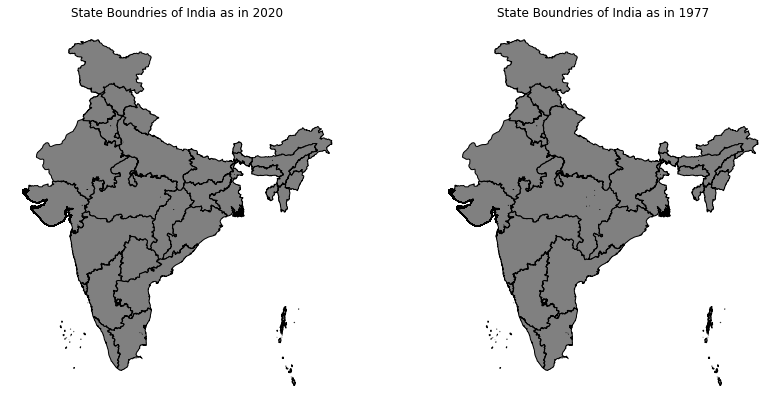

In [133]:
fig,(map_2020, map_1977)=plt.subplots(ncols=2, figsize=(14,7))

india_map_1977.plot(facecolor="gray", edgecolor="black", ax= map_1977)
map_1977.set_title("State Boundries of India as in 1977")
map_1977.axis("off")

india_map_2020.plot(facecolor="gray", edgecolor="black", ax= map_2020)
map_2020.set_title("State Boundries of India as in 2020")
map_2020.axis("off")


#### Saving the file
    This map (shapefile) will be used to create all the maps and visualization. 

In [135]:
india_map_1977.to_file("India Map\India Map 1977\india_map_1977.shp")